In [ ]:
# Airy problem solved using the rational transformation on the semi-infinite
# domain that is listed in Boyd, 2000
@time include("airy-rat.jl")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %Fetching: [=====>                                   ]  10.7 %Fetching: [=====>                                   ]  12.3 %Fetching: [======>                                  ]  14.0 %Fetching: [=======>                                 ]  15.9 %Fetching: [========>                                ]  17.7 %Fetching: [========>                                ]  19.7 %Fetching: [=============>                           ]  31.6 %Fetching: [==============>                          ]  32.5 %Fetching: [==============>                          ]  32.9 %Fetching: [==============>                          ]  33.3 %Fetching: [==============>                          ]  33.6 %Fetching: [==============>                          ]  33.9 %Fetching: [==============>                          ]  34.4 %Fetching: [===============>                         ]  35.0 %Fetching: [===============>                         ]  35.7 %Fetching: [=============

  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/data/.julia-20190315/environments/v1.4/Project.toml`
 [no changes]
   Updating `/data/.julia-20190315/environments/v1.4/Manifest.toml`
 [no changes]
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1260


RMS of eigenvalue error is 1.4796040812203412e-13

Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(.:31879): Gdk-CRITICAL **: 16:05:58.222: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed

(.:31879): Gdk-CRITICAL **: 16:05:58.249: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed



782.185626

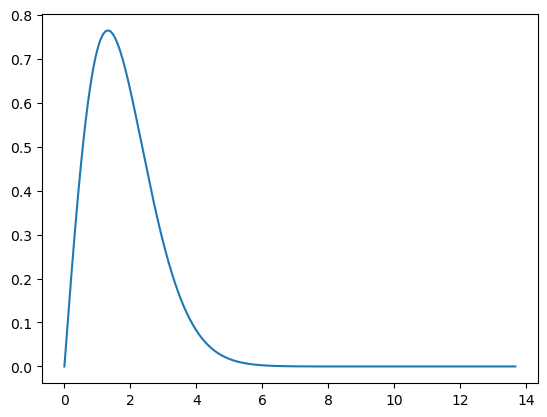

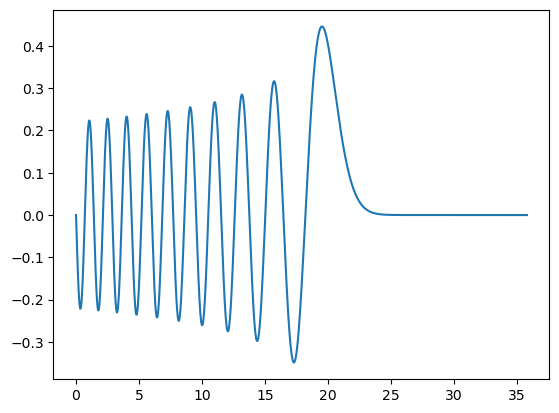

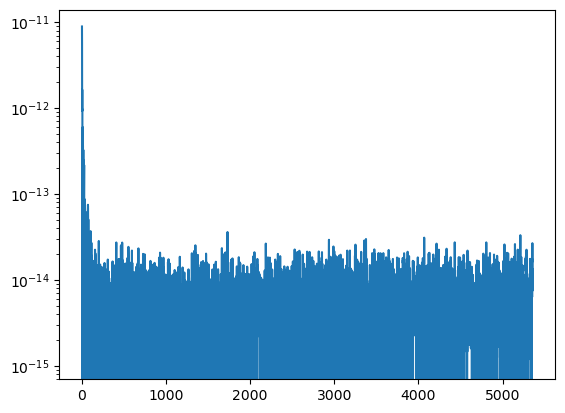

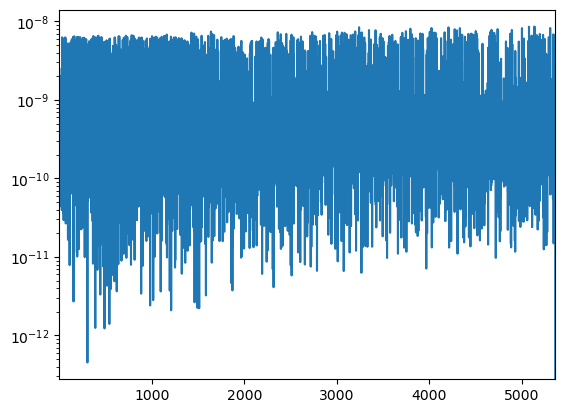

 seconds (48.93 M allocations: 20.913 GiB, 0.23% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe5239aedc0>

In [1]:
@time include("airy-linear.jl")

In [2]:
using SymPy
x=symbols("x")
integrate(x*cos(x)*exp(-x),x)

   -x             -x           -x       
x⋅ℯ  ⋅sin(x)   x⋅ℯ  ⋅cos(x)   ℯ  ⋅sin(x)
──────────── - ──────────── + ──────────
     2              2             2     

In [5]:
expand((1+x)^2*x*(1+x^2))

 5      4      3      2    
x  + 2⋅x  + 2⋅x  + 2⋅x  + x